In [21]:
import pandas as pd 
import requests
import matplotlib.pyplot as plt
import numpy as np
import json



In [22]:
BMI_Life_data = pd.read_csv("Resources/baseline_deaths_LB (1).csv")
BMI_Life_data.head()

,state,sex,race,age,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,...,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,-1.0,-1.0,-1.0,-1.0,2.388981e+06,2.360730e+06,2.380771e+06,2.381546e+06,2.378611e+06,2.357474e+06,...,2.408095e+06,2.426228e+06,2.448048e+06,2.460021e+06,2.517783e+06,2.548146e+06,2.579997e+06,2.616910e+06,2.657196e+06,2.688756e+06
1,-1.0,0.0,-1.0,-1.0,1.159678e+06,1.147022e+06,1.148551e+06,1.156753e+06,1.156916e+06,1.144822e+06,...,1.183854e+06,1.192921e+06,1.207093e+06,1.215521e+06,1.244222e+06,1.268613e+06,1.287053e+06,1.309518e+06,1.335317e+06,1.358729e+06
2,-1.0,1.0,-1.0,-1.0,1.223844e+06,1.209066e+06,1.227774e+06,1.221496e+06,1.217743e+06,1.209208e+06,...,1.219544e+06,1.229058e+06,1.236581e+06,1.240280e+06,1.267758e+06,1.273267e+06,1.287347e+06,1.302223e+06,1.315703e+06,1.324607e+06
3,-1.0,-1.0,0.0,-1.0,1.974330e+06,1.944685e+06,1.956963e+06,1.949845e+06,1.943675e+06,1.922681e+06,...,1.952981e+06,1.960721e+06,1.974215e+06,1.975529e+06,2.016173e+06,2.034365e+06,2.053248e+06,2.076215e+06,2.100534e+06,2.117658e+06
4,-1.0,-1.0,1.0,-1.0,2.705582e+05,2.674593e+05,2.670155e+05,2.702398e+05,2.696288e+05,2.653115e+05,...,2.697105e+05,2.723251e+05,2.733678e+05,2.773821e+05,2.839979e+05,2.865103e+05,2.901636e+05,2.942181e+05,2.985813e+05,3.005134e+05


In [23]:
BMI_Life_data.set_index(BMI_Life_data["state"], inplace=True)
BMI_Life_data=BMI_Life_data.drop(columns=["state","sex", "race", "age"], errors="ignore")
BMI_Life_data.head()

,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
state,,,,,,,,,,,,,,,,,,
-1.0,2.388981e+06,2.360730e+06,2.380771e+06,2.381546e+06,2.378611e+06,2.357474e+06,2.366633e+06,2.397611e+06,2.408095e+06,2.426228e+06,2.448048e+06,2.460021e+06,2.517783e+06,2.548146e+06,2.579997e+06,2.616910e+06,2.657196e+06,2.688756e+06
-1.0,1.159678e+06,1.147022e+06,1.148551e+06,1.156753e+06,1.156916e+06,1.144822e+06,1.152908e+06,1.174869e+06,1.183854e+06,1.192921e+06,1.207093e+06,1.215521e+06,1.244222e+06,1.268613e+06,1.287053e+06,1.309518e+06,1.335317e+06,1.358729e+06
-1.0,1.223844e+06,1.209066e+06,1.227774e+06,1.221496e+06,1.217743e+06,1.209208e+06,1.209667e+06,1.218741e+06,1.219544e+06,1.229058e+06,1.236581e+06,1.240280e+06,1.267758e+06,1.273267e+06,1.287347e+06,1.302223e+06,1.315703e+06,1.324607e+06
-1.0,1.974330e+06,1.944685e+06,1.956963e+06,1.949845e+06,1.943675e+06,1.922681e+06,1.927730e+06,1.946290e+06,1.952981e+06,1.960721e+06,1.974215e+06,1.975529e+06,2.016173e+06,2.034365e+06,2.053248e+06,2.076215e+06,2.100534e+06,2.117658e+06
-1.0,2.705582e+05,2.674593e+05,2.670155e+05,2.702398e+05,2.696288e+05,2.653115e+05,2.644784e+05,2.682687e+05,2.697105e+05,2.723251e+05,2.733678e+05,2.773821e+05,2.839979e+05,2.865103e+05,2.901636e+05,2.942181e+05,2.985813e+05,3.005134e+05


In [24]:
# BMI_new_name= {"state":[-1.0, 0.0, 1.0],
#                "state": ["US", "Alabama", "Arizona"] }
# New_name=pd.DataFrame(BMI_new_name) 

# column_name="New_name"
# old_name= -1.0
# new_name= "US"

# New_name.replace(old_name, new_name)

# df.head()

BMI_Life_data.rename(index={-1.0:"US", 0.0:"Alabama", 1.0:"Alaska", 2.0:"Arizona", 3.0:"Arkansas", 4.0:"California", 5.0:"Colorado", 6.0:"Connecticut", 7.0:"Delaware", 8.0:"District of Columbia", 9.0:"Florida", 10.0:"Georgia", 11.0:"Hawaii", 12.0:"Idaho", 13.0:"Illinois", 14.0:"Indiana", 15.0:"Iowa", 16.0:"Kansas", 17.0:"Kentucky", 18.0:"Louisiana", 19.0:"Maine", 
                           20.0:"Maryland", 21.0:"Massachusetts", 22.0:"Michigan", 23.0:"Minnesota", 24.0:"Mississippi", 25.0:"Missouri", 26.0:"Montana", 27.0:"Nebraska", 28.0:"Nevada", 29.0:"New Hampshire", 30.0:"New Jersey", 31.0:"New Mexico", 32.0:"New York", 33.0:"North Carolina", 34.0:"North Dakota", 35.0:"Ohio", 36.0:"Oklahoma",
                            37.0:"Oregon", 38.0:"Pennsylvania", 39.0:"Rhode Island", 40.0:"South Carolina", 41.0:"South Dakota", 42.0:"Tennessee", 43.0:"Texas", 44.0:"Utah", 45.0:"Vermont", 46.0:"Virginia", 47.0:"Washington", 48.0:"West Virginia", 49.0:"Wisconsin", 50.0:"Wyoming"
                           }, inplace=True)
BMI_Life_data.head()

,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
state,,,,,,,,,,,,,,,,,,
US,2.388981e+06,2.360730e+06,2.380771e+06,2.381546e+06,2.378611e+06,2.357474e+06,2.366633e+06,2.397611e+06,2.408095e+06,2.426228e+06,2.448048e+06,2.460021e+06,2.517783e+06,2.548146e+06,2.579997e+06,2.616910e+06,2.657196e+06,2.688756e+06
US,1.159678e+06,1.147022e+06,1.148551e+06,1.156753e+06,1.156916e+06,1.144822e+06,1.152908e+06,1.174869e+06,1.183854e+06,1.192921e+06,1.207093e+06,1.215521e+06,1.244222e+06,1.268613e+06,1.287053e+06,1.309518e+06,1.335317e+06,1.358729e+06
US,1.223844e+06,1.209066e+06,1.227774e+06,1.221496e+06,1.217743e+06,1.209208e+06,1.209667e+06,1.218741e+06,1.219544e+06,1.229058e+06,1.236581e+06,1.240280e+06,1.267758e+06,1.273267e+06,1.287347e+06,1.302223e+06,1.315703e+06,1.324607e+06
US,1.974330e+06,1.944685e+06,1.956963e+06,1.949845e+06,1.943675e+06,1.922681e+06,1.927730e+06,1.946290e+06,1.952981e+06,1.960721e+06,1.974215e+06,1.975529e+06,2.016173e+06,2.034365e+06,2.053248e+06,2.076215e+06,2.100534e+06,2.117658e+06
US,2.705582e+05,2.674593e+05,2.670155e+05,2.702398e+05,2.696288e+05,2.653115e+05,2.644784e+05,2.682687e+05,2.697105e+05,2.723251e+05,2.733678e+05,2.773821e+05,2.839979e+05,2.865103e+05,2.901636e+05,2.942181e+05,2.985813e+05,3.005134e+05


In [25]:
BMI_merge_df= BMI_Life_data.groupby("state").agg({"year_1999":"sum", "year_2000":"sum", "year_2001":"sum", "year_2002":"sum", "year_2003":"sum", "year_2004":"sum",	"year_2005":"sum", "year_2006":"sum", "year_2007":"sum", "year_2008":"sum", "year_2009":"sum", "year_2010":"sum", "year_2011":"sum", "year_2012":"sum", "year_2013":"sum", "year_2014":"sum", "year_2015":"sum", "year_2016":"sum"}).reset_index()
BMI_merge_df.head()

,state,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016
0,Alabama,2.578860e+05,2.514743e+05,2.540544e+05,2.481846e+05,2.584765e+05,2.536473e+05,2.529881e+05,2.578044e+05,2.635036e+05,2.632395e+05,2.620603e+05,2.667810e+05,2.699862e+05,2.757912e+05,2.779817e+05,2.822730e+05,2.879345e+05,2.871432e+05
1,Alaska,1.204687e+04,1.204687e+04,1.259792e+04,1.275390e+04,1.368553e+04,1.388380e+04,1.426458e+04,1.481104e+04,1.548646e+04,1.561074e+04,1.611151e+04,1.613808e+04,1.726960e+04,1.764494e+04,1.805280e+04,1.881809e+04,1.919061e+04,1.986794e+04
2,Arizona,2.132367e+05,2.264147e+05,2.287999e+05,2.348252e+05,2.326487e+05,2.323257e+05,2.374417e+05,2.452836e+05,2.572856e+05,2.544944e+05,2.608922e+05,2.631109e+05,2.693613e+05,2.727865e+05,2.760986e+05,2.901159e+05,2.955730e+05,3.022084e+05
3,Arkansas,1.567810e+05,1.563822e+05,1.513061e+05,1.516775e+05,1.538460e+05,1.498286e+05,1.508352e+05,1.505927e+05,1.535147e+05,1.601790e+05,1.595087e+05,1.565739e+05,1.605882e+05,1.618989e+05,1.641285e+05,1.688006e+05,1.657401e+05,1.725178e+05
4,California,1.333866e+06,1.308904e+06,1.370439e+06,1.314399e+06,1.352053e+06,1.329957e+06,1.328502e+06,1.348639e+06,1.338801e+06,1.334921e+06,1.381673e+06,1.372332e+06,1.396246e+06,1.399817e+06,1.409997e+06,1.446180e+06,1.441974e+06,1.457083e+06


Text(0.5, 1.0, 'Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

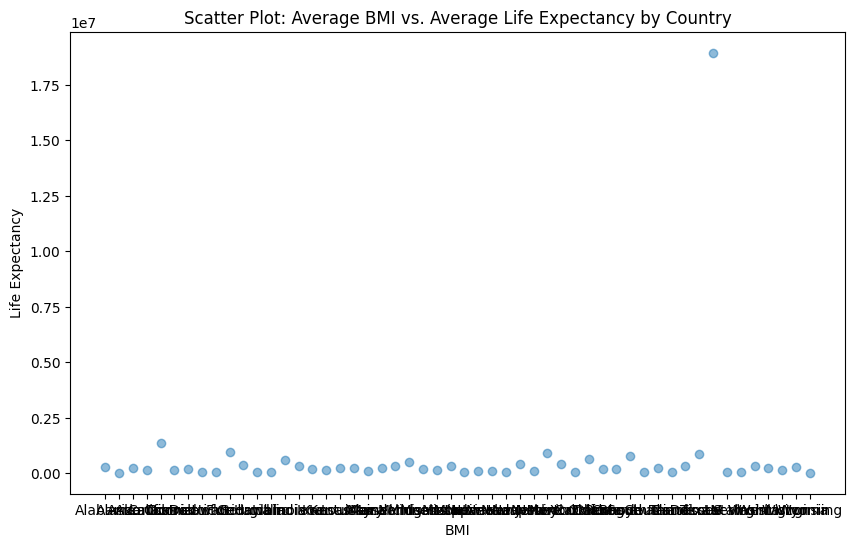

In [26]:
x_avg = BMI_merge_df['state']
y_avg = BMI_merge_df['year_1999']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')





In [27]:
from config import api_key

In [28]:
url="https://dataverse.harvard.edu/api/access/datafile/6191224"
states = "state"

query= f"{url}appid={api_key})"
response= requests.get(query)
response.json()


{'status': 'ERROR',
 'code': 404,
 'message': 'API endpoint does not exist on this server. Please check your code for typos, or consult our API guide at http://guides.dataverse.org.',
 'requestUrl': 'https://dataverse.harvard.edu/api/v1/access/datafile/6191224appid=3fd82596-4e48-4f2a-8722-f633cbd060c8)',
 'requestMethod': 'GET'}

In [29]:


x_value = BMI_Life_data["state"]
y_value = BMI_Life_data[{"year_1999", "year_2000", "year_2001", "year_2002", "year_2003", "year_2004", "year_2005", "year_2006", "year_2007",	"year_2008", "year_2009", "year_2010", "year_2011",	"year_2012", "year_2013", "year_2014", "year_2015",	"year_2016"}] 
plt.scatter(x_value, y_value)
plt.xlabel("State")
plt.ylabel("Years decrease becuase of BMI")
plt.title("Life Expectancy decrease as BMI increase")
plt.show()

KeyError: 'state'